# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [79]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta


from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [80]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [83]:
def test_hypers(neurons, drops, batch_sizes, optims, optimNames):
    for n_neurons in neurons:
        for drop in drops:
            for batch_size in batch_sizes:
                for i_o, optim in enumerate(optims):
                    n_epoch = 20
                    model = Sequential()
                    model.add(Dense(n_neurons, input_shape=(784,), activation='relu'))
                    if drop > 0:
                        model.add(Dropout(drop))
                    model.add(Dense(n_classes, activation='softmax'))
                    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                    history = model.fit(X_train, Y_train,
                                    batch_size=batch_size, epochs=n_epoch,
                                    verbose=1, validation_data=(X_test, Y_test))
                    pl.plot(history.history['loss'], label='Training')
                    pl.plot(history.history['val_loss'], label='Testing')
                    pl.ylabel('loss')
                    pl.xlabel('Number of epochs')
                    pl.title(optimNames[i_o]+' Batch size:'+str(batch_size)+' Nb epochs:'+str(n_epoch)+' Nb neurons:'+str(n_neurons)+' Dropout:'+ ('None' if drop < 0 else str(drop)))
                    pl.legend()
                    pl.grid()
                    pl.savefig('../outPut2/' + optimNames[i_o]+'_Batch_size'+str(batch_size)+' Nb_epochs'+str(n_epoch)+' Nb_neurons'+str(n_neurons)+'_Dropout_'+ ('None' if drop < 0 else str(drop)) + '.png', dpi=500)
                    score = model.evaluate(X_test, Y_test, verbose=0)
                    print('Test score:', score[0])
                    print('Test accuracy:', score[1])

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 1.4974 - accuracy: 0.5036 - val_loss: 0.9202 - val_accuracy: 0.7476
Epoch 2/20
938/938 [==============================] - 1s 1ms/step - loss: 0.7587 - accuracy: 0.7857 - val_loss: 0.6296 - val_accuracy: 0.8174
Epoch 3/20
938/938 [==============================] - 1s 1ms/step - loss: 0.6103 - accuracy: 0.8204 - val_loss: 0.5601 - val_accuracy: 0.8361
Epoch 4/20
938/938 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.8358 - val_loss: 0.5241 - val_accuracy: 0.8462
Epoch 5/20
938/938 [==============================] - 1s 1ms/step - loss: 0.5236 - accuracy: 0.8447 - val_loss: 0.4973 - val_accuracy: 0.8548
Epoch 6/20
938/938 [==============================] - 1s 1ms/step - loss: 0.5021 - accuracy: 0.8519 - val_loss: 0.4824 - val_accuracy: 0.8574
Epoch 7/20
938/938 [==============================] - 1s 1ms/step - loss: 0.4859 - accuracy: 0.8556 - val_loss: 0.4727 - val_accuracy: 0.8585
Epoch 

TypeError: can only concatenate str (not "int") to str

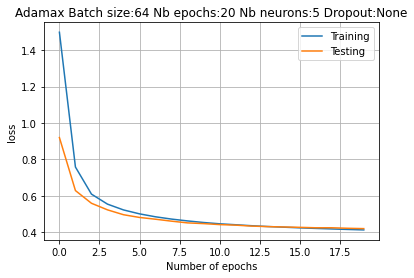

In [84]:
test_hypers([5, 50, 100, 300], [-1, 0.3, 0.5], [64, 128, 256], [Adamax(), Adagrad(), Adadelta()], ['Adamax', 'Adagrad', 'Adadelta'])

784 entrées 10 sortie et 300 neurones dans la couche cachée.

In [72]:
n_neurons = 300
drop = -1
model = Sequential()
model.add(Dense(n_neurons, input_shape=(784,), activation='relu'))
if drop > 0:
    model.add(Dropout(drop))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 300)               235500    
                                                                 
 dense_22 (Dense)            (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


Define some constants and train the MLP

In [73]:
'''
 #copy for test 
batch_size = 10, 30, 50, 70, 90,110, 128
n_epoch = 5, 10, 15,20,25,30,35

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

for i in batch_size:
    for j in n_epoch:
        history = model.fit(X_train, Y_train,
                    batch_size=i, epochs=j,
                    verbose=1, validation_data=(X_test, Y_test))
'''

"\n #copy for test \nbatch_size = 10, 30, 50, 70, 90,110, 128\nn_epoch = 5, 10, 15,20,25,30,35\n\nmodel.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])\n\nfor i in batch_size:\n    for j in n_epoch:\n        history = model.fit(X_train, Y_train,\n                    batch_size=i, epochs=j,\n                    verbose=1, validation_data=(X_test, Y_test))\n"

In [74]:
batch_size = 128
n_epoch = 20

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 2.2226 - accuracy: 0.2034 - val_loss: 2.1628 - val_accuracy: 0.2592
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 2.1158 - accuracy: 0.3187 - val_loss: 2.0555 - val_accuracy: 0.3741
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 2.0118 - accuracy: 0.4238 - val_loss: 1.9514 - val_accuracy: 0.4798
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 1.9113 - accuracy: 0.5168 - val_loss: 1.8511 - val_accuracy: 0.5682
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 1.8147 - accuracy: 0.5890 - val_loss: 1.7551 - val_accuracy: 0.6313
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 1.7226 - accuracy: 0.6409 - val_loss: 1.6637 - val_accuracy: 0.6723
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 1.6348 - accuracy: 0.6757 - val_loss: 1.5767 - val_accuracy: 0.7008
Epoch 

Show the performance of the model

Test score: 0.8664988279342651
Test accuracy: 0.8285999894142151


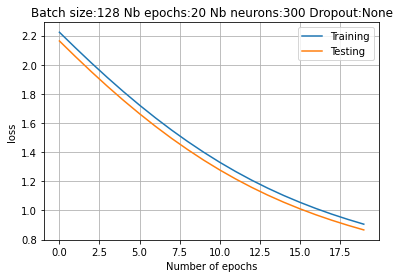

In [75]:

pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.ylabel('loss')
pl.xlabel('Number of epochs')
pl.title('Batch size:'+str(batch_size)+' Nb epochs:'+str(n_epoch)+' Nb neurons:'+str(n_neurons)+' Dropout:'+ ('None' if drop < 0 else str(drop)) )
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Confusion matrix

In [76]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

array([[ 919,    0,    5,   13,    0,    4,   27,    1,   10,    1],
       [   0, 1095,   15,    3,    0,    0,    4,    1,   17,    0],
       [  18,   48,  817,   43,   15,    0,   33,   11,   45,    2],
       [  11,    6,   29,  862,    1,   26,    7,   20,   36,   12],
       [   2,   11,   12,    0,  729,    1,   35,    5,   19,  168],
       [  35,   19,   13,  102,   42,  566,   20,   18,   58,   19],
       [  31,   13,   13,    1,    2,   15,  878,    1,    4,    0],
       [   3,   37,   33,    3,   14,    0,    2,  898,    6,   32],
       [  17,   35,   18,   74,    8,   16,   17,   18,  742,   29],
       [  14,   20,   24,    8,   64,   10,    1,   67,   21,  780]],
      dtype=int64)